<span style="font-size: 22px; font-family: Arial, sans-serif; font-weight: bold;">The goal of this notebook is to use the housing dataset to train the neural network model and use it to predict the price of a new house. In this project I'll document the process of exploring and preparing the data, setting up the neural network model, and interpreting the output. By the end of this workbook, we should have a fully trained model capable to predict the price of a house based on its features.
</span>

### 1. Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydot
#import tensorflow
#from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import plot_model

### 2. Sourcing the dataset

<span style="font-size: 16px; font-family: Arial, sans-serif;">The dataset shows house features, such as the number of bathrooms, stories, airconditioning or furnishing status, and price. The input file contains 545 rows and 13 rows. Each row represents on house - price and remaining features. In my project, I'll use price as the target variable and the remaining columns as features describing the price. This data set was sourced from Kaggle.
<br>
<br>
https://www.kaggle.com/code/ashydv/housing-price-prediction-linear-regression/input
</span>

In [2]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### 3. Data exploring

<span style="font-size: 16px; font-family: Arial, sans-serif;">In the housing dataset, we have several columns containing non-numeric values that cannot be entered into the neural network model. Since I don't want to remove these columns, I will replace their contents with numeric values.</span>

In [3]:
df = pd.read_csv('Housing.csv')

#transforming yes/no columns using mapping dictionary
mapping = {'yes': 1.0, 'no': 0.0}
yes_no_columns = ['mainroad','guestroom','basement','hotwaterheating', 'airconditioning', 'prefarea']
df[yes_no_columns] = df[yes_no_columns].replace(mapping).astype(int)

#transforming furnishing status column using mapping dictionary
mapping = {'furnished': 1.0, 'semi-furnished': 2.0, 'unfurnished' : 3.0}
df['furnishingstatus'] = df['furnishingstatus'].replace(mapping).astype(int)

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,3
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,3
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


<span style="font-size: 16px; font-family: Arial, sans-serif;">The next step is data validation. It's required to check if there are any missing/nan values in my dataset. Additionally, I will check the data types for each of the columns.
</span>

In [4]:
#checking for null values
nan_check = df.isnull().any()

#checking for nans
null_check = df.isna().any()

#printing the results
df_validation = pd.concat([nan_check,null_check], axis = 1)
df_validation.columns = ['nan', 'null']
print(df_validation)
print(df.info())

                    nan   null
price             False  False
area              False  False
bedrooms          False  False
bathrooms         False  False
stories           False  False
mainroad          False  False
guestroom         False  False
basement          False  False
hotwaterheating   False  False
airconditioning   False  False
parking           False  False
prefarea          False  False
furnishingstatus  False  False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int32
 6   guestroom         545 non-null    int32
 7   basement          545 non-null    int32
 8   hotwat

<span style="font-size: 16px; font-family: Arial, sans-serif;">
I also want to verify the distribution of my target variable. I will remove the extreme values to avoid a negative impact on my model. These will be houses priced over 10 million as there are not many data points available for this price range.
</span>

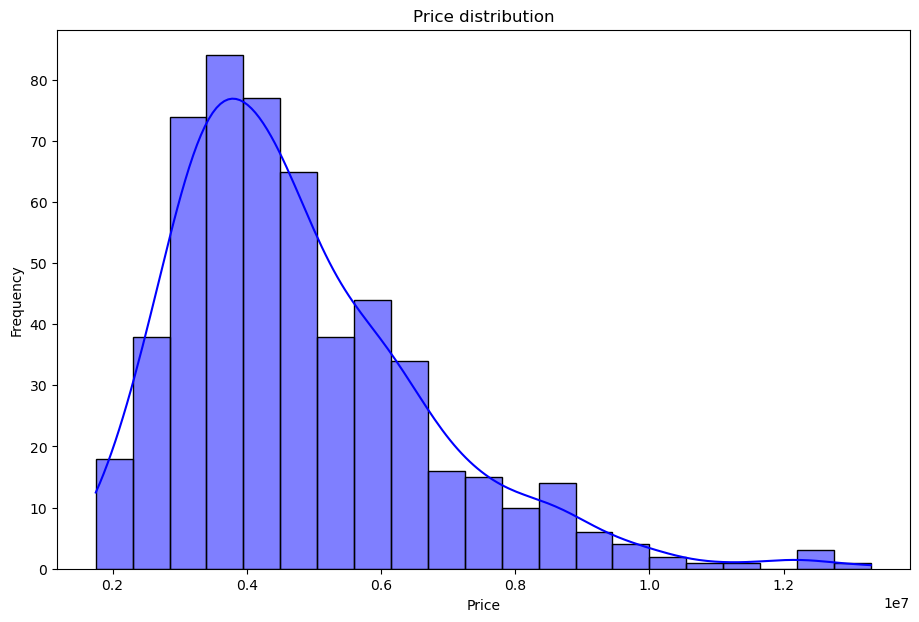

In [5]:
#printing a chart with price distribution
plt.figure(figsize=(11, 7))
sns.histplot(data=df, x='price', kde=True, color = 'blue')

#formatting plot area
plt.title("Price distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

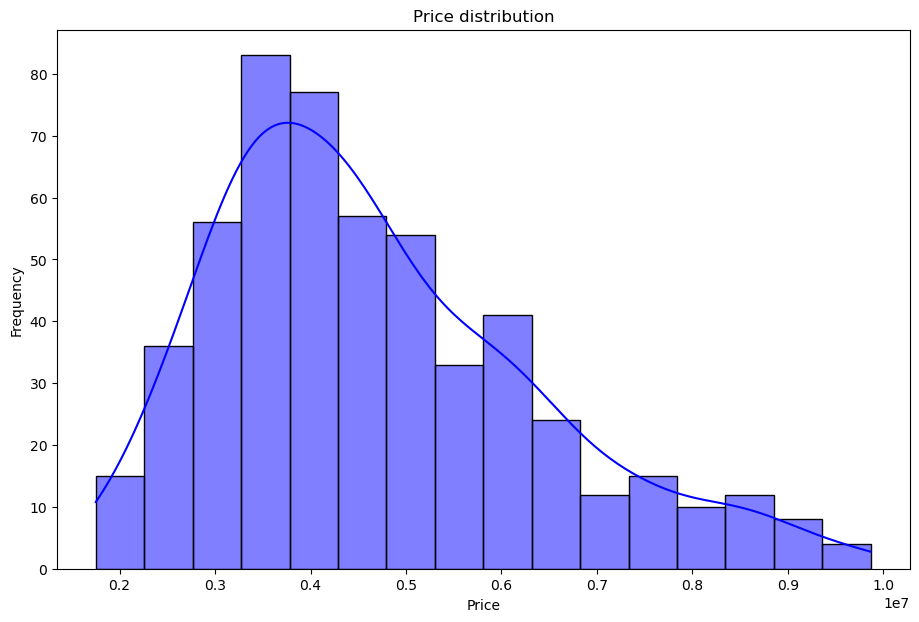

In [6]:
#limiting the df based on price value
df = df[df['price'] < 10000000]
plt.figure(figsize=(11, 7))
sns.histplot(data=df, x='price',kde=True, color = 'blue')

#formatting plot area
plt.title("Price distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

<span style="font-size: 16px; font-family: Arial, sans-serif;">The correlation between the features of the data set is another important validation point. This will not be a direct factori in the process of establishing the neural network, but it can provide valuable information. This analysis will identify highly correlated features (may be redundant in model learning) and help assess feature importance (correlation with target variable)
</span>

<AxesSubplot:>

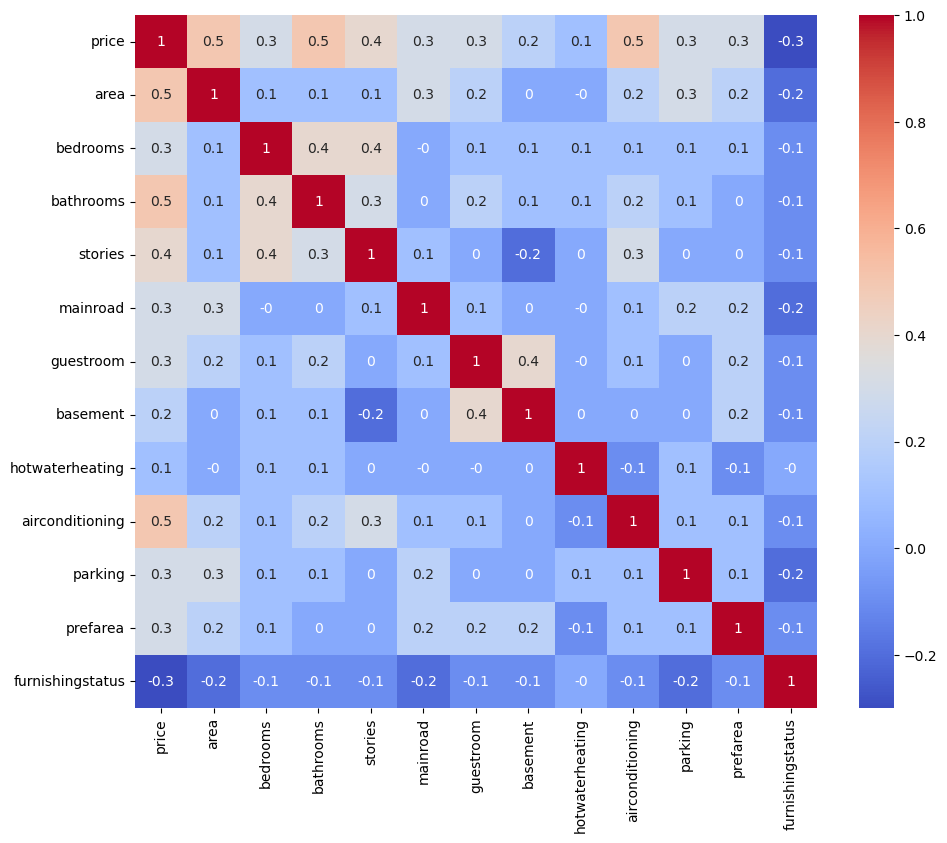

In [7]:
plt.figure(figsize=(11, 9))
sns.heatmap(round(df.corr(),1), annot=True, cmap="coolwarm")

<span style="font-size: 16px; font-family: Arial, sans-serif;">Our matrix is showing a correlation between a couple of features - for example bathroom feature is correlated with the stories feature but considering the relatively low correlation value I will not exclude them from the analysis.
<br>
<br>
The above correlation matrix is showing a positive correlation between area, bathrooms, and air conditioning features with price. So using one feature as an example - generally with a growing area of a house the price is increasing. This correlation is displayed below.
</span>

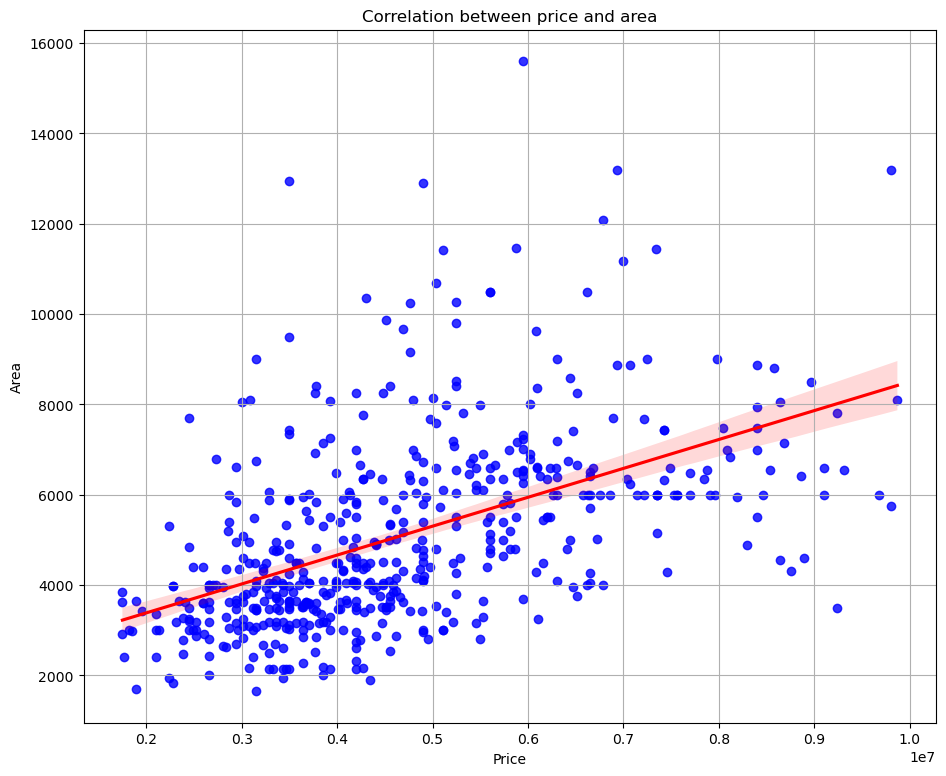

In [8]:
#definig a regplot
plt.figure(figsize=(11, 9))
sns.regplot(x=df['price'], y=df['area'], color = 'blue',line_kws={'color': 'r'})

#formatting plot area
plt.xlabel('Price')
plt.ylabel('Area')
plt.title('Correlation between price and area')
plt.grid()
plt.show()

### 4. Scaling the data and model fit

<span style="font-size: 16px; font-family: Arial, sans-serif;">Before the data can be fitted into the neural network it needs to be transformed to make sure all of the features are at the same scale. It helps to avoid the dominance of some features with higher magnitudes and makes the calculation faster.
<br>
<br>
I decided to use normalization as I want to keep the original feature distribution. The scaling method can be changed in the hyper tuning phase.
</span>

In [9]:
#transformig the df into an array and defining target variable (y) and features (X)
df_val = df.values
X = df_val[:,1:13]
y = df_val[:,0]

#setting the scaler
scaler = MinMaxScaler()

#fitting the scaler
scaler.fit(X)

#normalizing the data
X = scaler.transform(X)

#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(429, 12)
(108, 12)
(429,)
(108,)


<span style="font-size: 16px; font-family: Arial, sans-serif;">It's time to define the network. I'll be using the sequential (feedforward) model which is commonly used in regression and classification tasks.
<br>
<br>
The input layer is a dense layer (a fully connected layer, a layer where each neuron is connected to every single neuron in the previous layer) with 12 neurons. This amount of neurons is matching the number of features. The activation method is ReLU (Rectified Linear Unit), which is commonly used in regression problems. It's allowing the network to learn non-linear, complex patterns, and thanks to its computing efficiency it's greatly improving the predictive power of the network.
<br>
<br>
Considering, that my dataset contains a relatively low amount of data and features I'm initiating my network with only 2 hidden layers to avoid overfitting. Hidden layers will contain 32 and 16 neurons to avoid overfitting at the early stage of the learning process. Additionally, some tests showed that adding a third hidden layer did not greately improve model performance. The activation method for hidden layers is ReLu.
<br>
<br>
The optimizer for my neural network is the Adaptive Moment Estimation optimizer. It's the combination of adaptive learning rates and gradient updates, which makes it a popular choice for neural network models. Since I already excluded some outlier values I'll use mean absolute error as my loss metric.
</span>

In [10]:
model = Sequential()

# input layer
model.add(Dense(12))

# hidden layers
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')

<span style="font-size: 16px; font-family: Arial, sans-serif;">
Once the model is defined and complied I can finally fit previously prepared data and see how the model is behaving.
<br>
<br>
For batch size, I decided to keep a small value of 8 iterations for better memory efficiency and faster convergence (model adjustments toward optimal solution). The epoch number is set at 100.
</span>

In [11]:
history = model.fit(x=X_train,y=y_train, validation_data=(X_test,y_test),batch_size=8,epochs=100,verbose=0)

<span style="font-size: 16px; font-family: Arial, sans-serif;">
Model is trained. Now we can access the model summary.
</span>

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 32)                416       
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,117
Trainable params: 1,117
Non-trainable params: 0
_________________________________________________________________


<span style="font-size: 16px; font-family: Arial, sans-serif;">
We can also create a graph using plot_model() function.
</span>

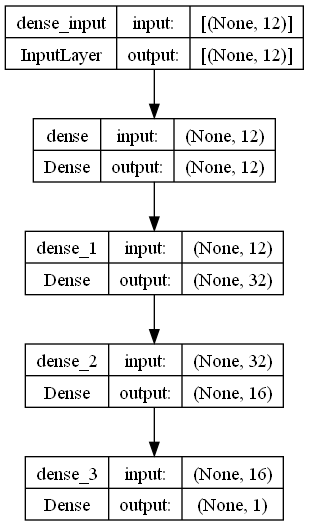

In [13]:
plot_model(model, to_file='model.png', show_shapes=True)

<span style="font-size: 16px; font-family: Arial, sans-serif;">
Moreover, we can access model performance for each epoch. 
</span>

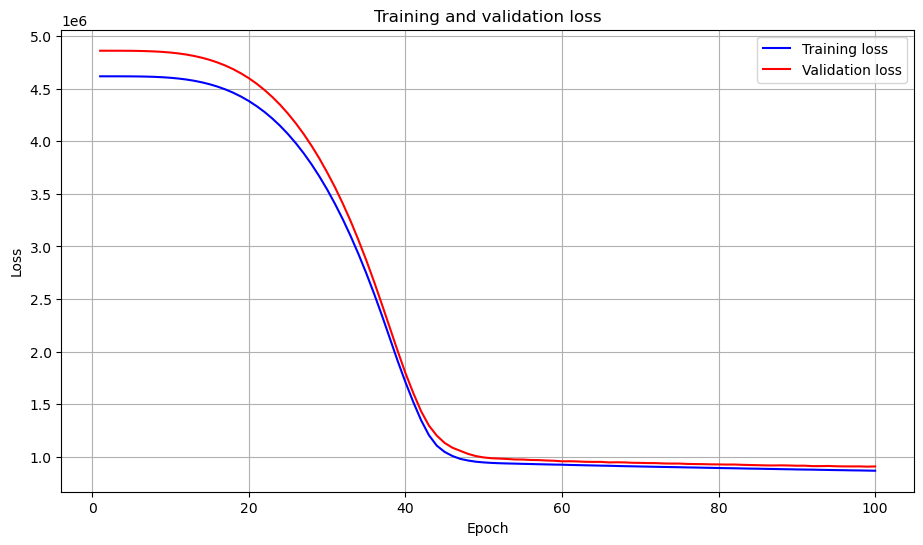

In [14]:
#accessing model history
validation_df = pd.DataFrame(model.history.history)

#setting the value of epochs
epochs = range(1, len(validation_df) + 1)

#printing a chart with model performance
plt.figure(figsize=(11,6))
plt.plot(epochs, validation_df['loss'], color = 'blue', label='Training loss')
plt.plot(epochs, validation_df['val_loss'], color = 'red', label='Validation loss')

#formatting plot area
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

<span style="font-size: 16px; font-family: Arial, sans-serif;">
Training loss is showing the difference between predicted values and actual values in the training dataset. Validation loss is showing the difference between predicted and actual values in the validation dataset which has not been used in the training. It shows how the model will handle 'unseen' data.
<br>
<br>
In our case, the initial trend of both curves shows that training loss is slightly under validation loss. It indicates that initially, the model is overfitting the data. However, it's not a concern, because both values are dropping around between epochs 20 and 40, and in the final stages, both values are at a relatively low and equal level.
</span>



### 5. Validating the results

<span style="font-size: 16px; font-family: Arial, sans-serif;">
The model is a fit and I'm happy with its learning performance. Now I can produce some predictions and see if the model is capturing and predicting the price accurately.
</span>

4/4 [==============================] - 0s 2ms/step


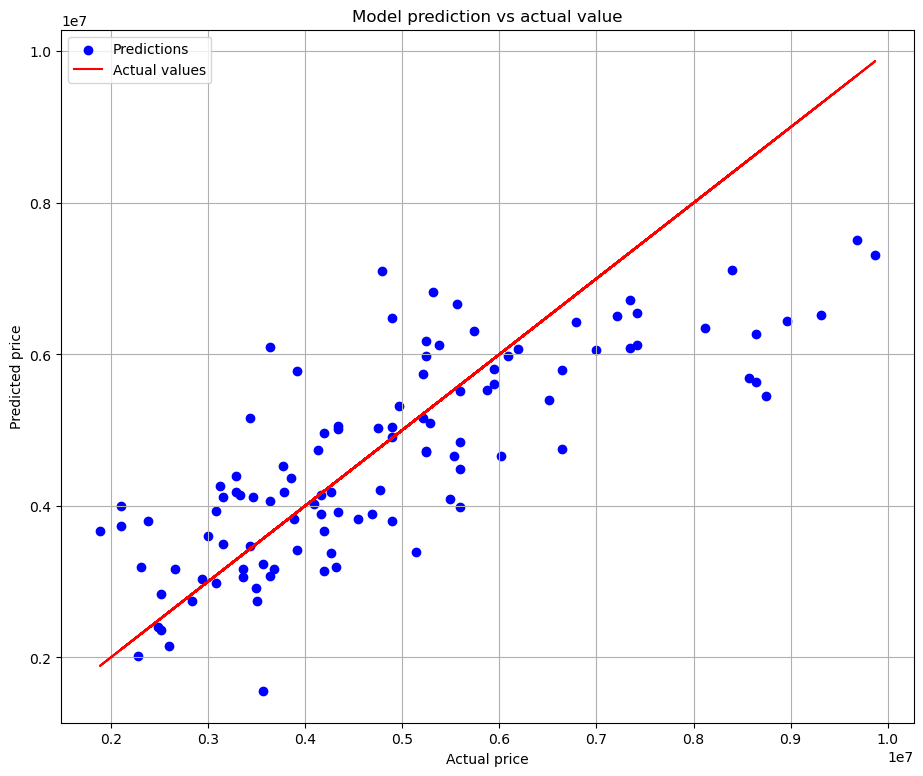

In [15]:
# producing some predictions
predictions = model.predict(X_test)

# Our model predictions
plt.figure(figsize=(11, 9))
plt.scatter(y_test,predictions, color = 'blue', label = 'Predictions')

# Perfect predictions
plt.plot(y_test,y_test,color = 'red', label = 'Actual values')

plt.title('Model prediction vs actual value')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.grid()
plt.legend()
plt.show()

<span style="font-size: 16px; font-family: Arial, sans-serif;">
The model predictions for the price range up to 6-7M seem to be aligning just fine with the actual prices. Some of the values are overstated, some are understated but there's no visible bias. However, for houses priced over 7M, the model is understating the price. So it seems that our model is not the best for predicting the prices for expensive houses, but is working with reasonable accuracy for houses that are priced under approx. 7M.
</span>

In [16]:
#accessing one record from original df to generate a set of features
index = 300
new_features = df.iloc[index,1:]

#printing new features
print("New features:")
print(new_features)

#scaling new features based on previously fitted scaler 
new_features = new_features.values
new_features = scaler.transform(new_features.reshape(-1,12))

#generating new prediction and printing it with original price
print("Prediction:",model.predict(new_features)[0,0])
print("Actual price:",df.iloc[index,0:1].values[0])

New features:
area                4046
bedrooms               3
bathrooms              1
stories                2
mainroad               1
guestroom              0
basement               1
hotwaterheating        0
airconditioning        0
parking                1
prefarea               0
furnishingstatus       2
Name: 308, dtype: int64
1/1 [==============================] - 0s 25ms/step
Prediction: 4483016.5
Actual price: 4165000


<span style="font-size: 16px; font-family: Arial, sans-serif;">
The network is trained and it's able to predict a price of a house based on its features. The next step in this project would be to hyper-tune the model parameters such as neuron structure, and amount of hidden layers, or experiment with different activation functions. Moreover, additional experiments with different batch sizes and a number of epochs can be conducted to see the behavior of the neural network.
</span>